In [1]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load raw data
raw_path = "../data/raw/creditcard.csv"
df = pd.read_csv(raw_path)

### Basic exploration (shape, head, info, describe)

In [3]:
# Quick check
display(df.head(5))
display(df.tail())

# print(f"\nMemory usage:\n{df.memory_usage(deep=True)}")
# Class==0 > represents non-fraud
# Class==1 > represents fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
# Understand structure, types, missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# check data description
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.384974e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.021879e-15  1.494498e-15 -5.620335e-16  1.149614e-16 -2.414189e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [6]:
# Handle class imbalance
# Credit card fraud datasets are highly imbalanced (~0.17% fraud).
# We can just note it here, later we’ll handle in modeling (resampling, class weights, or SMOTE).
print(df['Class'].value_counts())
print('------------')
print(df['Class'].value_counts(normalize=True) * 100)

Class
0    284315
1       492
Name: count, dtype: int64
------------
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


### Data Quality Checks

In [7]:
# Missing values
print(f"Has missing values: {df.isnull().values.any()}") # # Returns True if there are ANY missing values in the entire DataFrame
print(f"\nMissing per column:\n{df.isnull().sum()}")

# to HOW MANY total missing values
total_missing = df.isnull().sum().sum()
print(f"Total missing values: {total_missing}")

Has missing values: False

Missing per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Total missing values: 0


In [8]:
# Check duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Show duplicated rows
duplicates = df[df.duplicated(keep=False)] # keep=False to show all duplicates
duplicates.groupby('Class').size() # count duplicates per class


Duplicate rows: 1081


Class
0    1822
1      32
dtype: int64

In [9]:
# preview the first few duplicates
duplicates.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
220,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,...,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0
221,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,...,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0


In [10]:
# Since fraud rows are very rare, those 32 rows are potentially important.
# I'll keep all class 1 duplicates (fraud)
# Remove class 0 duplicates (non-fraud) — they are abundant and won’t affect the model much

# Separate duplicates
duplicates = df[df.duplicated(keep=False)] # keep=False to get all duplicates

# Class 0 duplicates to drop
duplicates_0 = duplicates[duplicates['Class'] == 0]

# Drop them from the dataframe
df = df.drop(duplicates_0.index)

### Analyze target variable (class imbalance)

In [11]:
# Check result
print("Remaining duplicates:")
print(df[df.duplicated(keep=False)].groupby('Class').size())
print("Updated class distribution:")
print(df['Class'].value_counts())

# 282493 - 284315
# less -1822 from non-fraud

Remaining duplicates:
Class
1    32
dtype: int64
Updated class distribution:
Class
0    282493
1       492
Name: count, dtype: int64


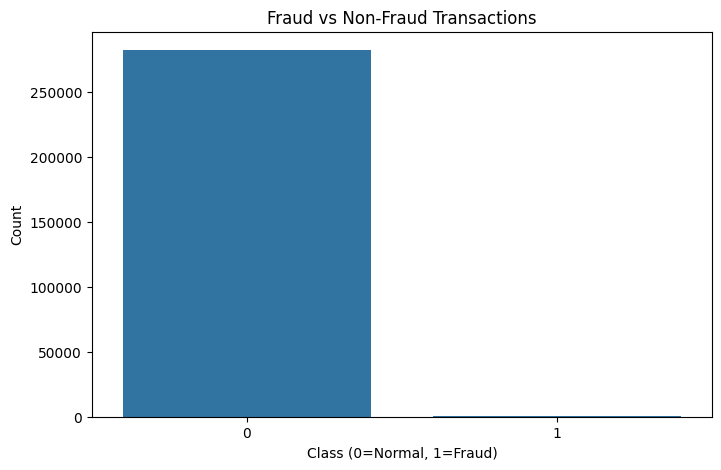


Fraud percentage: 0.174%


In [12]:
#  Visualize imbalance
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Class')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Class (0=Normal, 1=Fraud)')
plt.ylabel('Count')
plt.show()

# Calculate imbalance ratio
fraud_ratio = df['Class'].sum() / len(df) * 100
print(f"\nFraud percentage: {fraud_ratio:.3f}%")

### Feature analysis (Amount, Time distributions)

Amount statistics:
count    282985.000000
mean         88.535583
std         250.558135
min           0.000000
25%           5.580000
50%          22.000000
75%          77.710000
max       25691.160000
Name: Amount, dtype: float64

Time statistics:
count    282985.000000
mean      94815.737251
std       47477.346727
min           0.000000
25%       54218.000000
50%       84707.000000
75%      139292.000000
max      172792.000000
Name: Time, dtype: float64


/var/folders/4d/vjwz0rnd5_b7jqryzlkcq_y80000gn/T/ipykernel_81427/1214131131.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Class']==0]['Amount'], df[df['Class']==1]['Amount']],


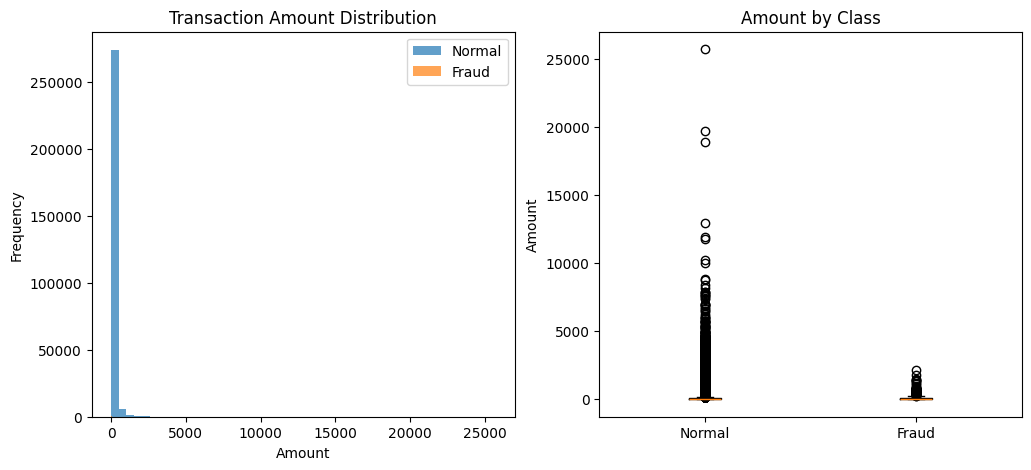

In [13]:
# Check Amount distribution
print("Amount statistics:")
print(df['Amount'].describe())

# Check Time distribution
print("\nTime statistics:")
print(df['Time'].describe())

# Visualize Amount by Class
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df[df['Class']==0]['Amount'], bins=50, alpha=0.7, label='Normal')
plt.hist(df[df['Class']==1]['Amount'], bins=50, alpha=0.7, label='Fraud')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.title('Transaction Amount Distribution')

plt.subplot(1, 2, 2)
plt.boxplot([df[df['Class']==0]['Amount'], df[df['Class']==1]['Amount']], 
            labels=['Normal', 'Fraud'])
plt.ylabel('Amount')
plt.title('Amount by Class')
plt.show()

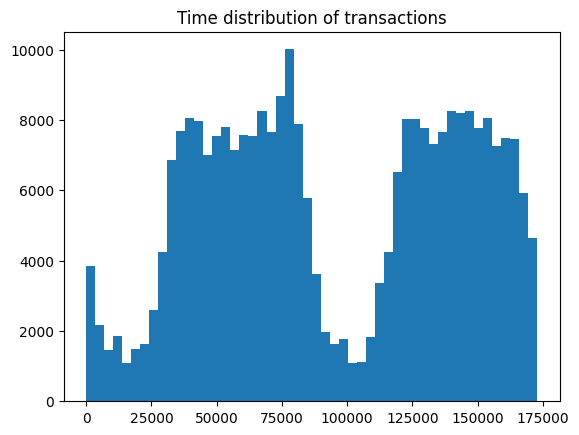

In [14]:
# Let's see Time column distribution
plt.hist(df['Time'], bins=50)
plt.title("Time distribution of transactions")
plt.show()


Time is usually the seconds elapsed from the first transaction in the dataset.
It is not a datetime, just a numeric counter.

Why it matters:
- Some fraud patterns may be time-dependent (e.g., multiple frauds in a short period).
- To include temporal features in the model, we can create derived features, like:
    - hour_of_day = (Time // 3600) % 24
    - day_of_week = (Time // 86400) % 7 (if we want a weekly pattern)
    - day_of_month = (Time // 604800) % 30 (if we want a monthly pattern)
    

In [20]:
# Extract Time-based features
# Note: The dataset only contains ~48 hours of data
df['Hour'] = (df['Time'] // 3600) % 24
df['Day'] = (df['Time'] // (3600*24)).astype(int)   # Result: 0 or 1
df['Month'] = (df['Time'] // (3600*24*30)).astype(int) # Result: always 0

# df['Hour'] = (df['Time'] // 3600) % 24
# df['Day'] = (df['Time'] // (3600*24)) % 7
# df['Month'] = (df['Time'] // (3600*24*30)) % 12

/var/folders/4d/vjwz0rnd5_b7jqryzlkcq_y80000gn/T/ipykernel_81427/1854460928.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Day 0 (First 24h)', 'Day 1 (Second 24h)'])


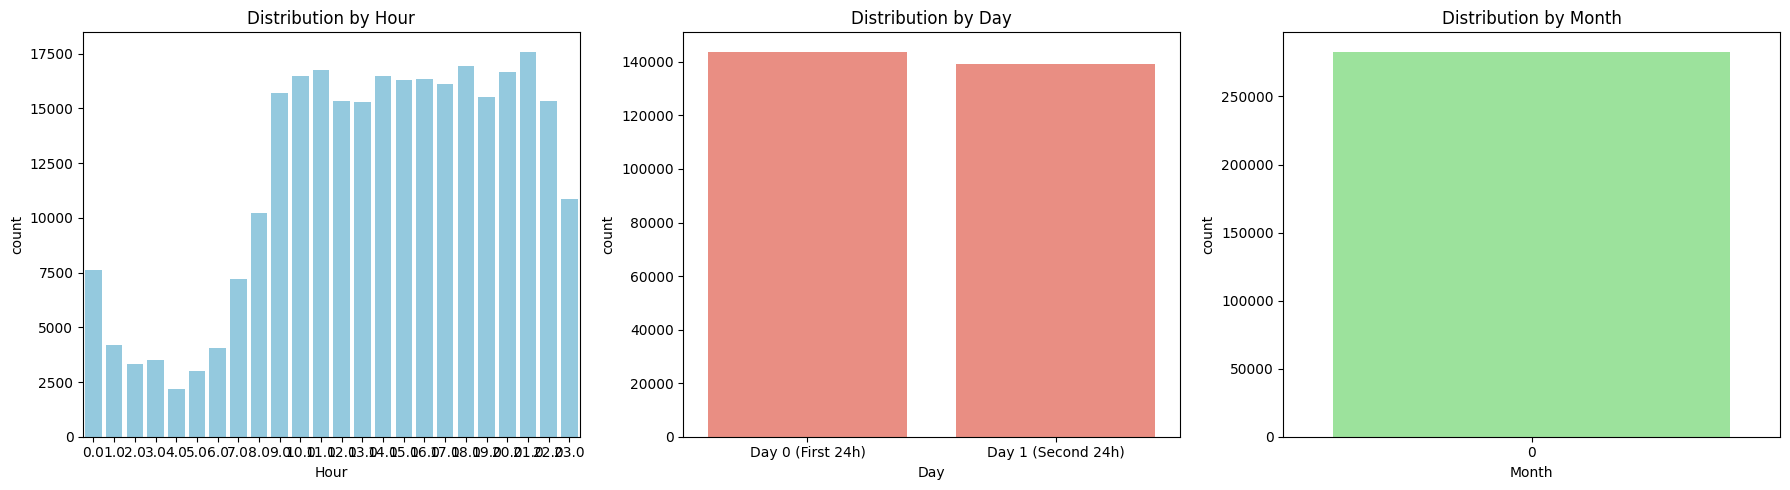

In [21]:
# Visualize distributions for Hour, Day and Month
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Hour Distribution (0-23)
sns.countplot(data=df, x='Hour', ax=axes[0], color='skyblue')
axes[0].set_title('Distribution by Hour')

# Day Distribution (Day 0 vs Day 1)
sns.countplot(data=df, x='Day', ax=axes[1], color='salmon')
axes[1].set_title('Distribution by Day')
axes[1].set_xticklabels(['Day 0 (First 24h)', 'Day 1 (Second 24h)'])

# Month Distribution (Will only show Month 0)
sns.countplot(data=df, x='Month', ax=axes[2], color='lightgreen')
axes[2].set_title('Distribution by Month')

plt.tight_layout()
plt.show()

/var/folders/4d/vjwz0rnd5_b7jqryzlkcq_y80000gn/T/ipykernel_81427/2071972612.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


Plot successfully saved to: ../experiments/hour_distribution_catplot.png


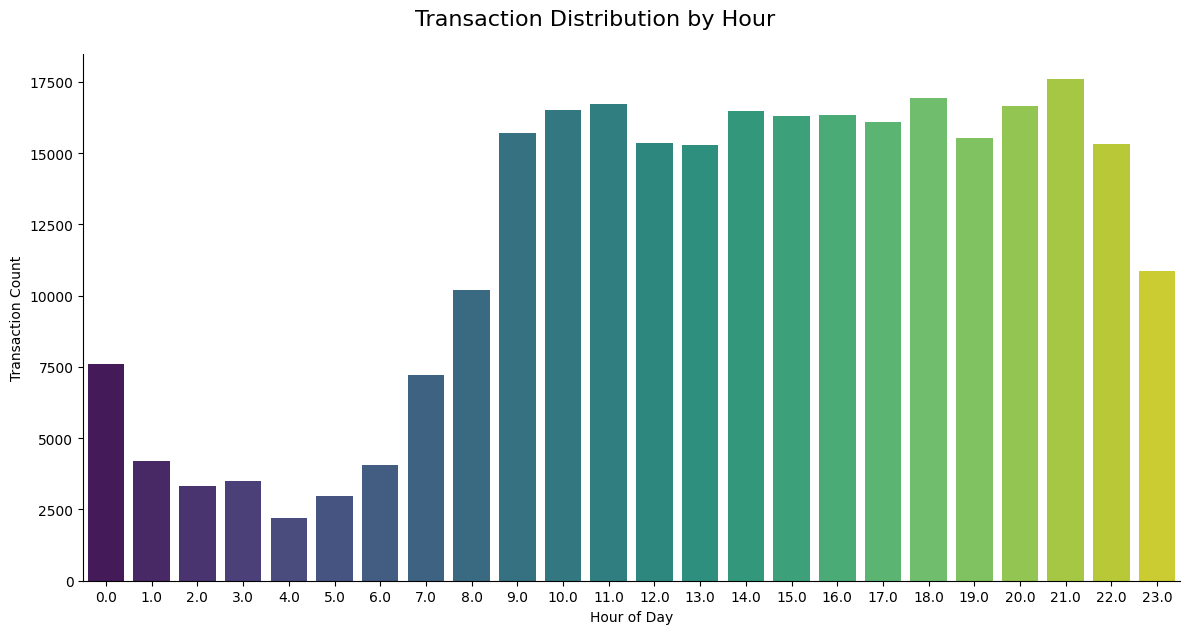

In [25]:
# Hour Distribution (0-23) using catplot for a high-quality visualization
g = sns.catplot(
    data=df, 
    x='Hour', 
    kind='count', 
    palette='viridis', 
    height=6, 
    aspect=2
)

# Set the title and labels
g.set_axis_labels("Hour of Day", "Transaction Count")
g.fig.suptitle('Transaction Distribution by Hour', fontsize=16, y=1.05)

# Save the plot to the experiments folder
save_path = '../experiments/hour_distribution_catplot.png'
g.savefig(save_path, bbox_inches='tight')

print(f"Plot successfully saved to: {save_path}")
plt.show()

However, for a first baseline model, we can just leave it as-is and/or scale it with the other numeric features.

### Data Preprocessing: Scale features (Amount, Time)

In [19]:
# Scale Amount and Time (V1-V28 are already scaled from PCA)

scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_scaled'] = scaler.fit_transform(df[['Time']])

# Option: Drop original Amount and Time
# df = df.drop(['Amount', 'Time'], axis=1)